Train - Fractured: ['119-rotated1-rotated2-rotated3.jpg', '63-rotated3-rotated1-rotated2.jpg', '83-rotated2-rotated3-rotated1.jpg', '34-rotated1-rotated3-rotated2.jpg', '19-rotated1-rotated3-rotated3.jpg']
Train - Not Fractured: ['6-rotated1-rotated3.jpg', '25-rotated2-rotated1-rotated3-rotated1.jpg', '42-rotated1-rotated2-rotated3-rotated1.jpg', '63-rotated3-rotated1-rotated2.jpg', '34-rotated1-rotated3-rotated2.jpg']


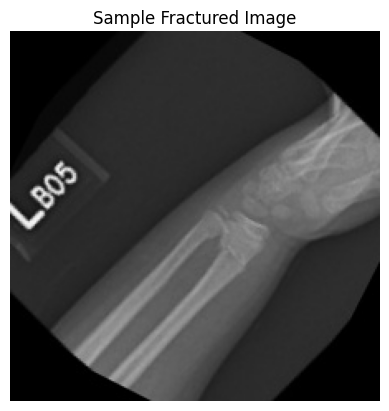

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


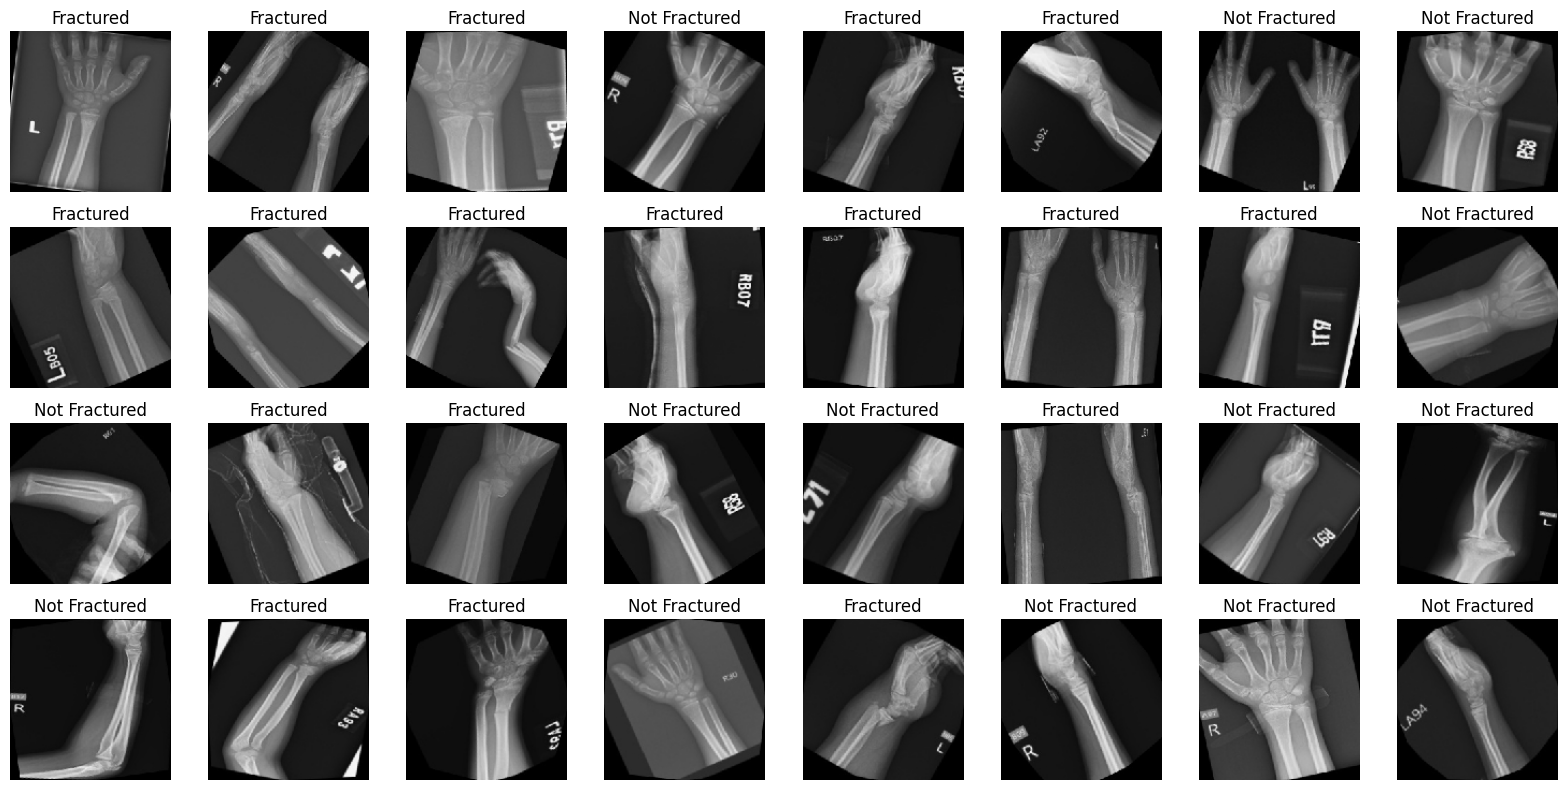

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


277/277 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.6271 - loss: 0.6313 - val_accuracy: 0.6617 - val_loss: 0.5632
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy: 0.7842 - loss: 0.4514 - val_accuracy: 0.7183 - val_loss: 0.6456
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.8809 - loss: 0.2909 - val_accuracy: 0.7067 - val_loss: 0.7216
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.9296 - loss: 0.1858 - val_accuracy: 0.6867 - val_loss: 0.8046
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 436s 1s/step - accuracy: 0.9598 - loss: 0.1244 - val_accuracy: 0.7200 - val_loss: 0.7422
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 403s 1s/step - accuracy: 0.9730 - loss: 0.0831 - val_accuracy: 0.7383 - val_loss: 0.7566
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 375s 1s/step - accuracy: 0.9754 - loss: 0.0712 - val_accuracy: 0.6950 - val_loss: 0.7467
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 367s 1s/step - accuracy: 0.9832 - loss: 0.0555 - val_accuracy: 0.756

Saving 4-rotated2-rotated3-rotated2-rotated1.jpg to 4-rotated2-rotated3-rotated2-rotated1.jpg


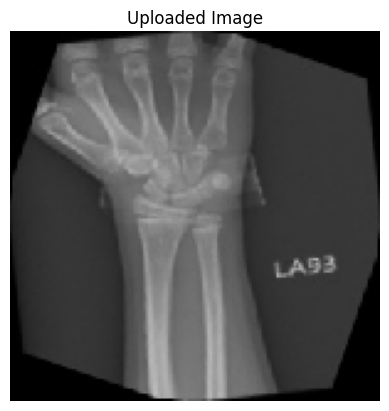

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Prediction: Not Fractured


In [2]:
# Bone Fracture Detection using CNN - Practical 5

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from google.colab import files
from PIL import Image
import zipfile

# Step 0: Unzip Dataset
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('unzipped_folder')

# Step 1: Paths
train_path = "unzipped_folder/archive (6)/train"
val_path = "unzipped_folder/archive (6)/val"

# Step 2: Print some image names
print("Train - Fractured:", os.listdir(os.path.join(train_path, "fractured"))[:5])
print("Train - Not Fractured:", os.listdir(os.path.join(train_path, "not fractured"))[:5])

# Step 3: Visualize one image
sample_image_path = os.path.join(train_path, "fractured", os.listdir(os.path.join(train_path, "fractured"))[0])
img = Image.open(sample_image_path)
plt.imshow(img)
plt.title("Sample Fractured Image")
plt.axis("off")
plt.show()

# Step 4: Data Generator
img_size = (150, 150)

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)

# Step 5: Visualize 32 images in a grid
def plot_images(images_arr, labels):
    fig, axes = plt.subplots(4, 8, figsize=(16, 8))
    axes = axes.flatten()
    for img, lbl, ax in zip(images_arr, labels, axes):
        ax.imshow(img)
        ax.set_title('Fractured' if lbl == 0 else 'Not Fractured')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_images, sample_labels = next(train_generator)
plot_images(sample_images, sample_labels)

# Step 6: Create Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Step 7: Compile and Train
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Step 8: Save Model
model.save("bone_fracture_cnn_model.h5")

# Step 9: Predict Uploaded Image
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size=img_size)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    print("Prediction:", "Not Fractured" if prediction[0][0] > 0.5 else "Fractured")


Saving 19-rotated2-rotated3-rotated3.jpg to 19-rotated2-rotated3-rotated3.jpg


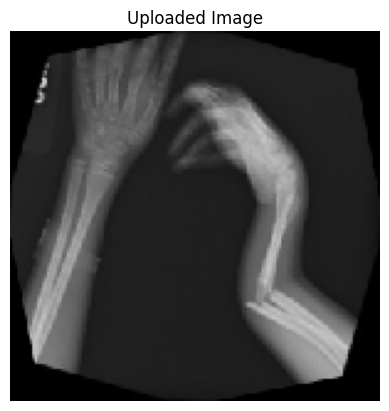

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction: Fractured


In [3]:
# Step 9: Predict Uploaded Image
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size=img_size)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    print("Prediction:", "Not Fractured" if prediction[0][0] > 0.5 else "Fractured")
